# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
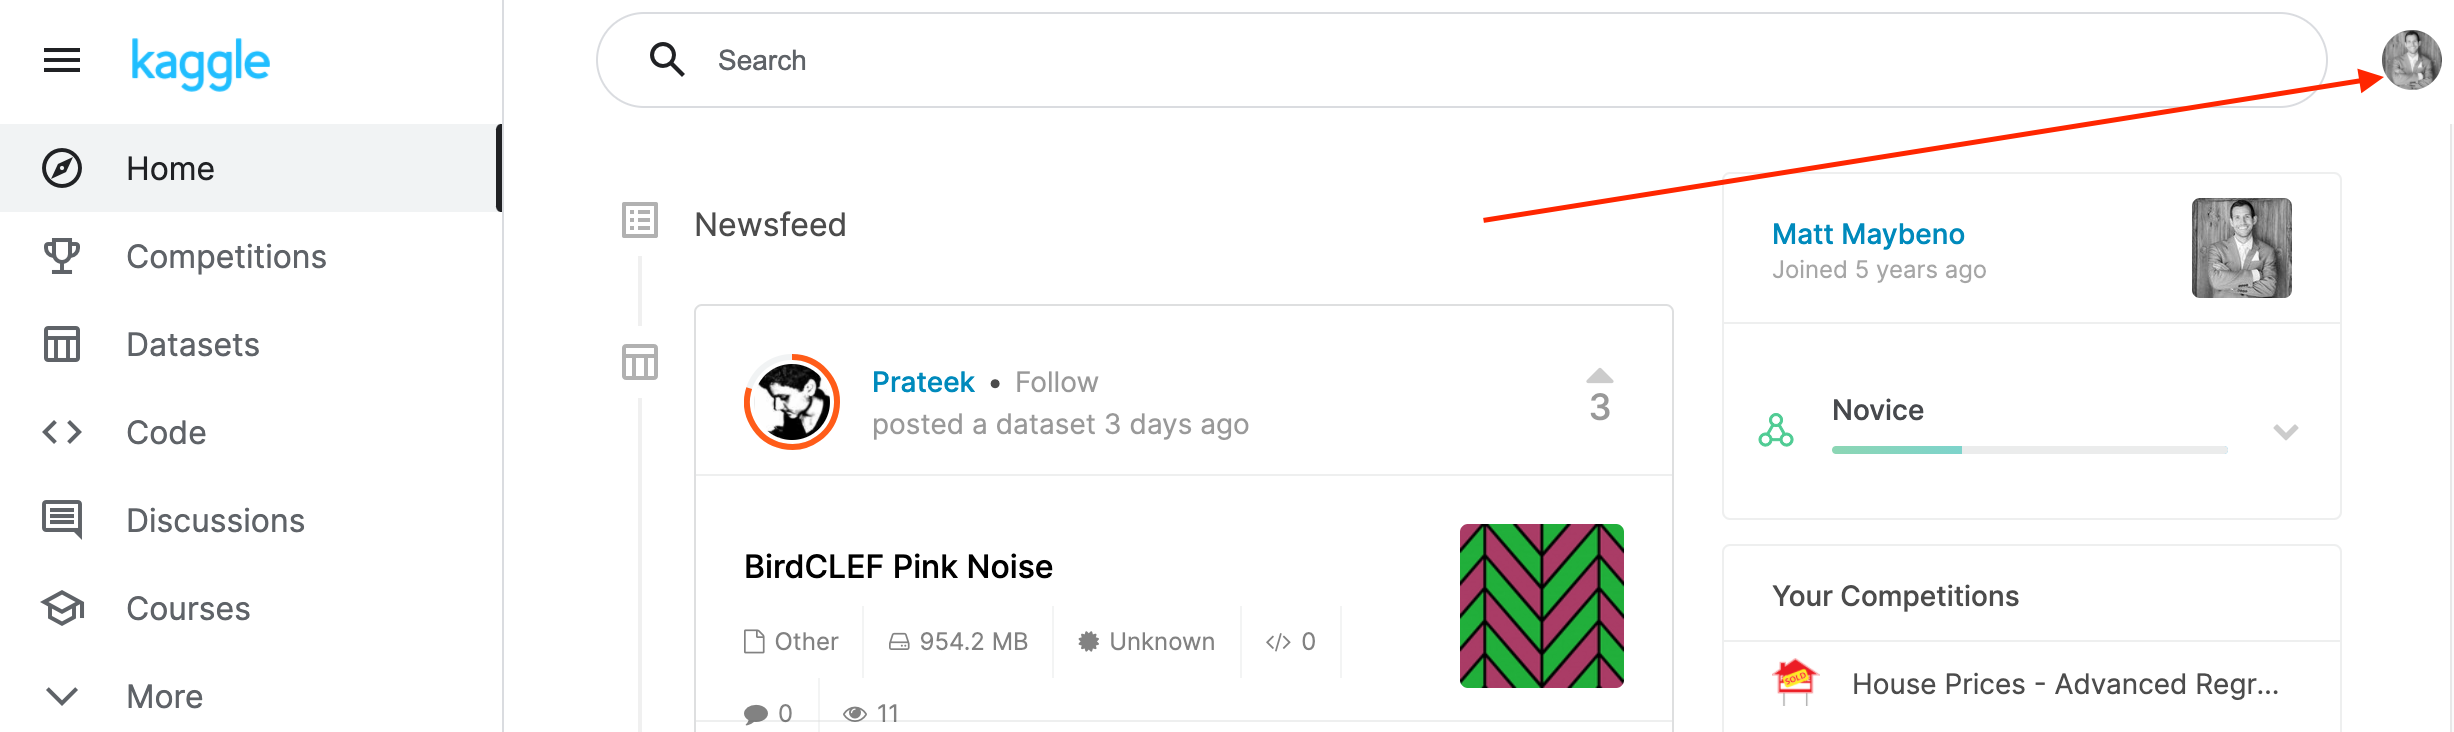
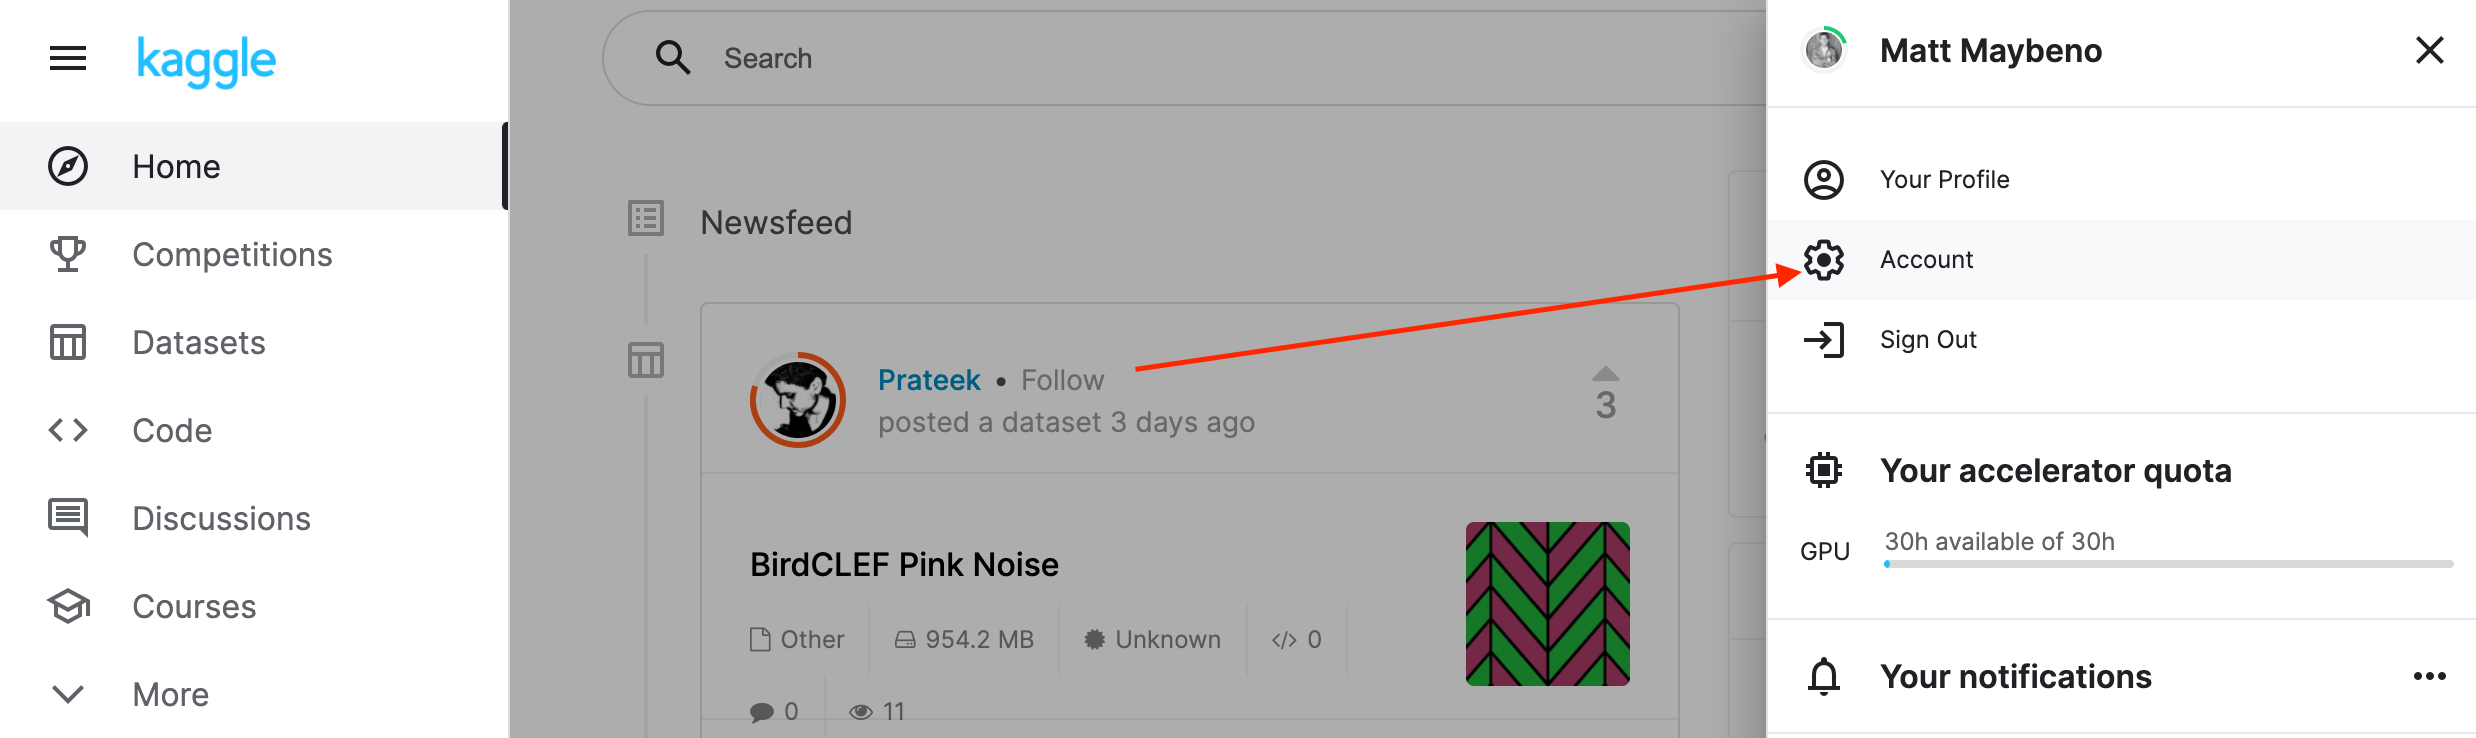
2. Scroll down to API and click Create New API Token.
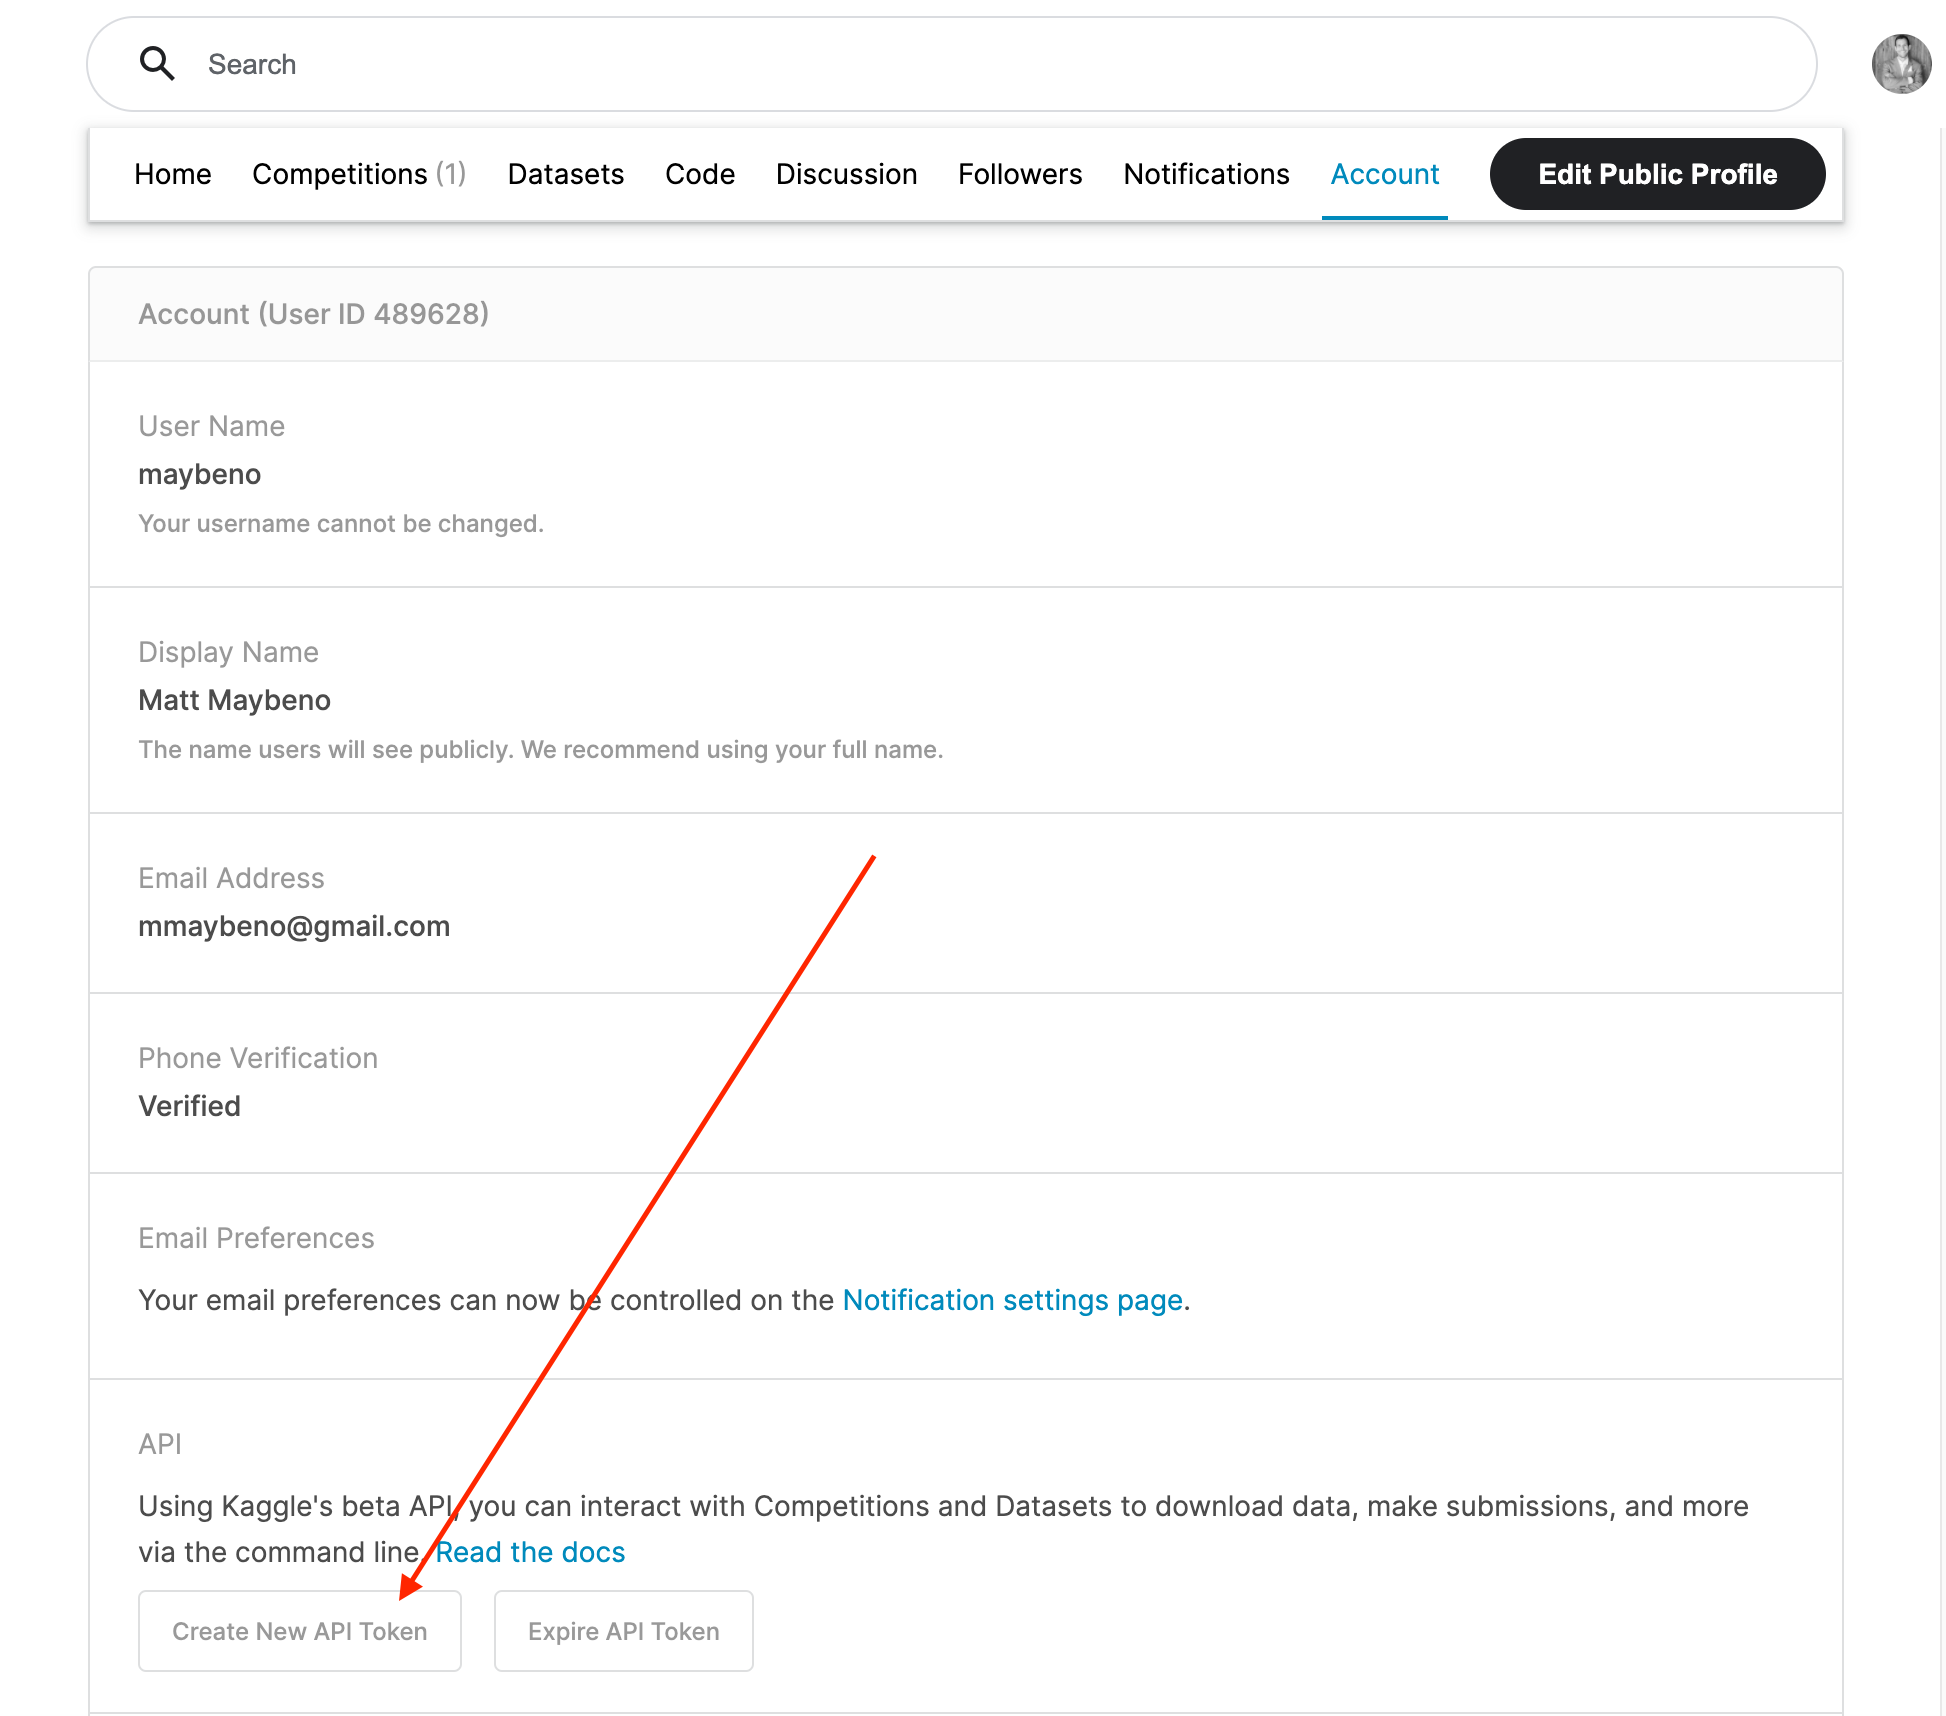
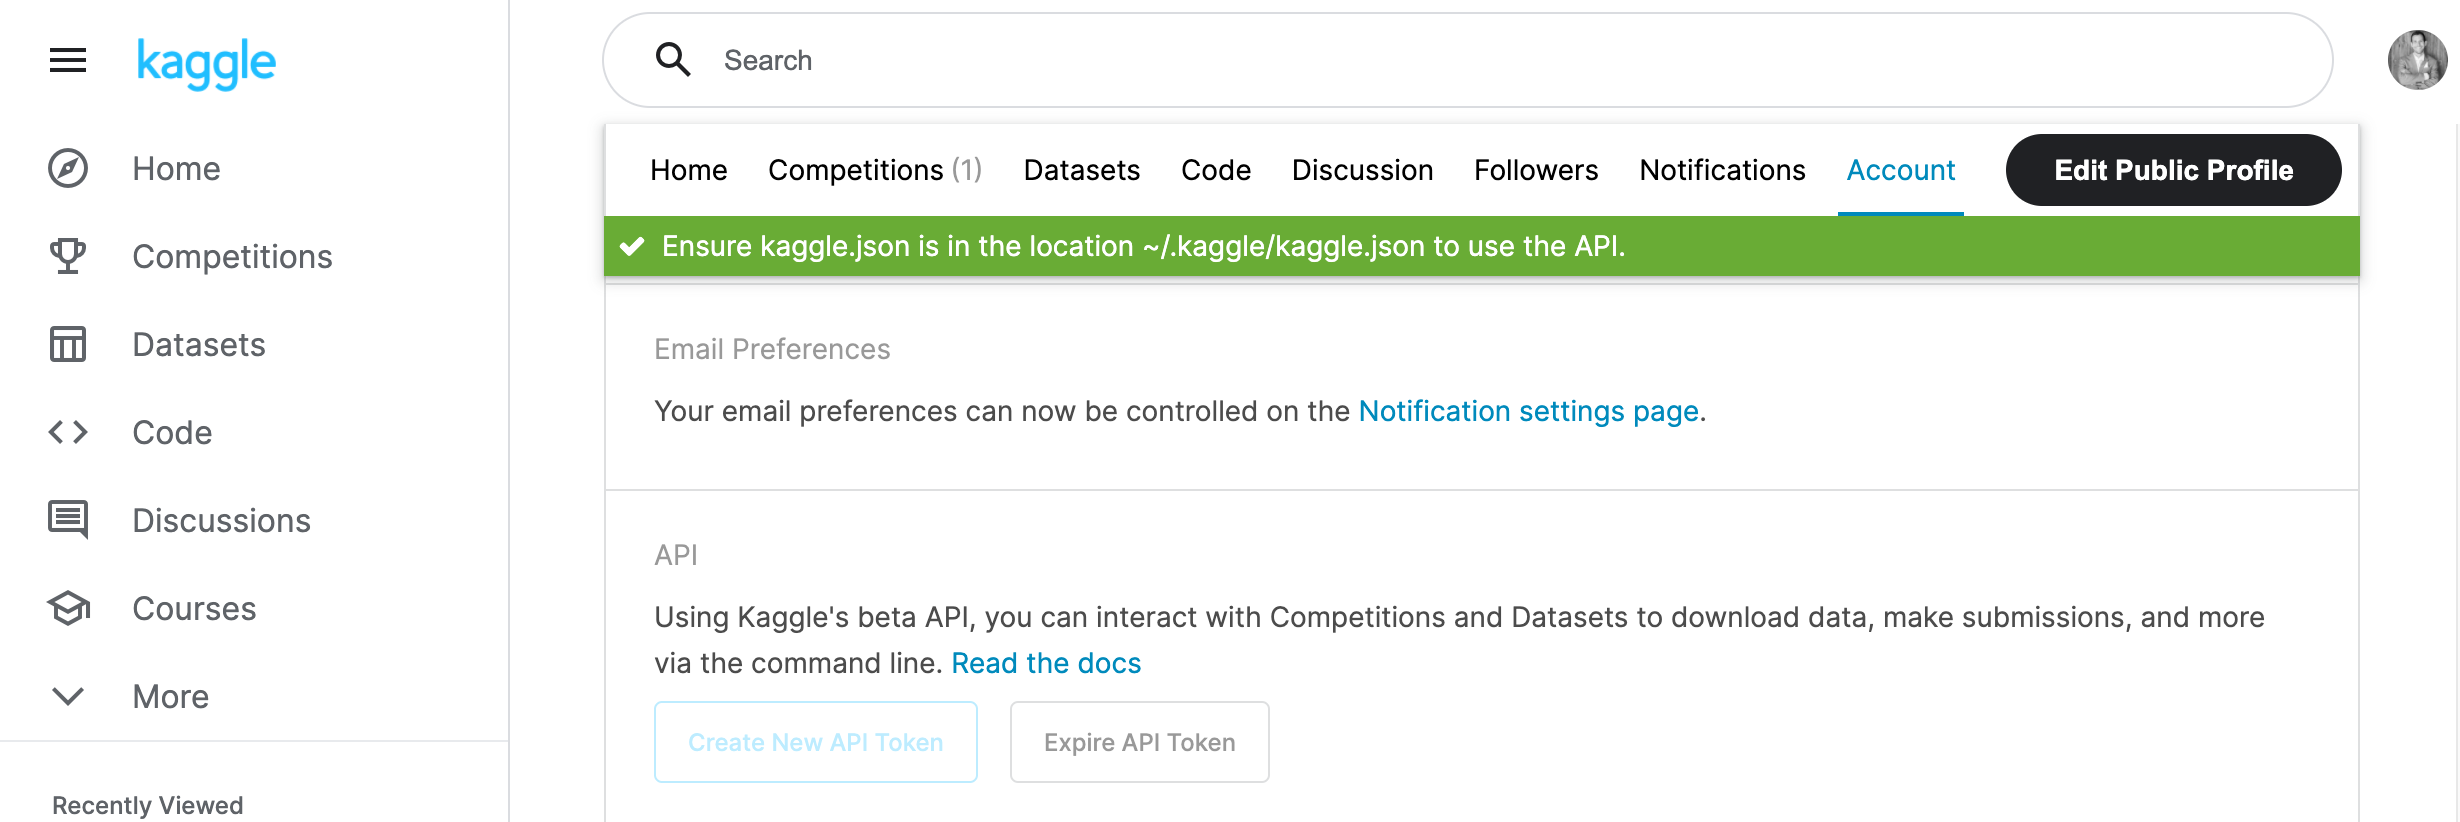
3. Open up `kaggle.json` and use the username and key.
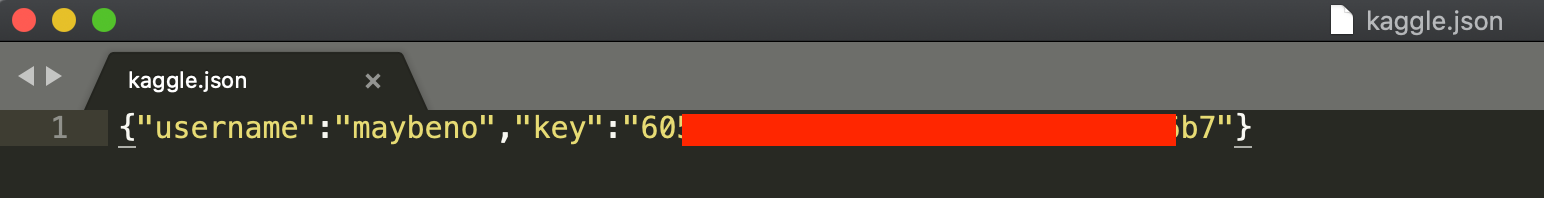

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.5.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 184.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 156.2 MB/s eta 0:00:00
     ━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "asmaahanine"
kaggle_key = "3c216d230d35ca764c12c0b34e1a09b0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
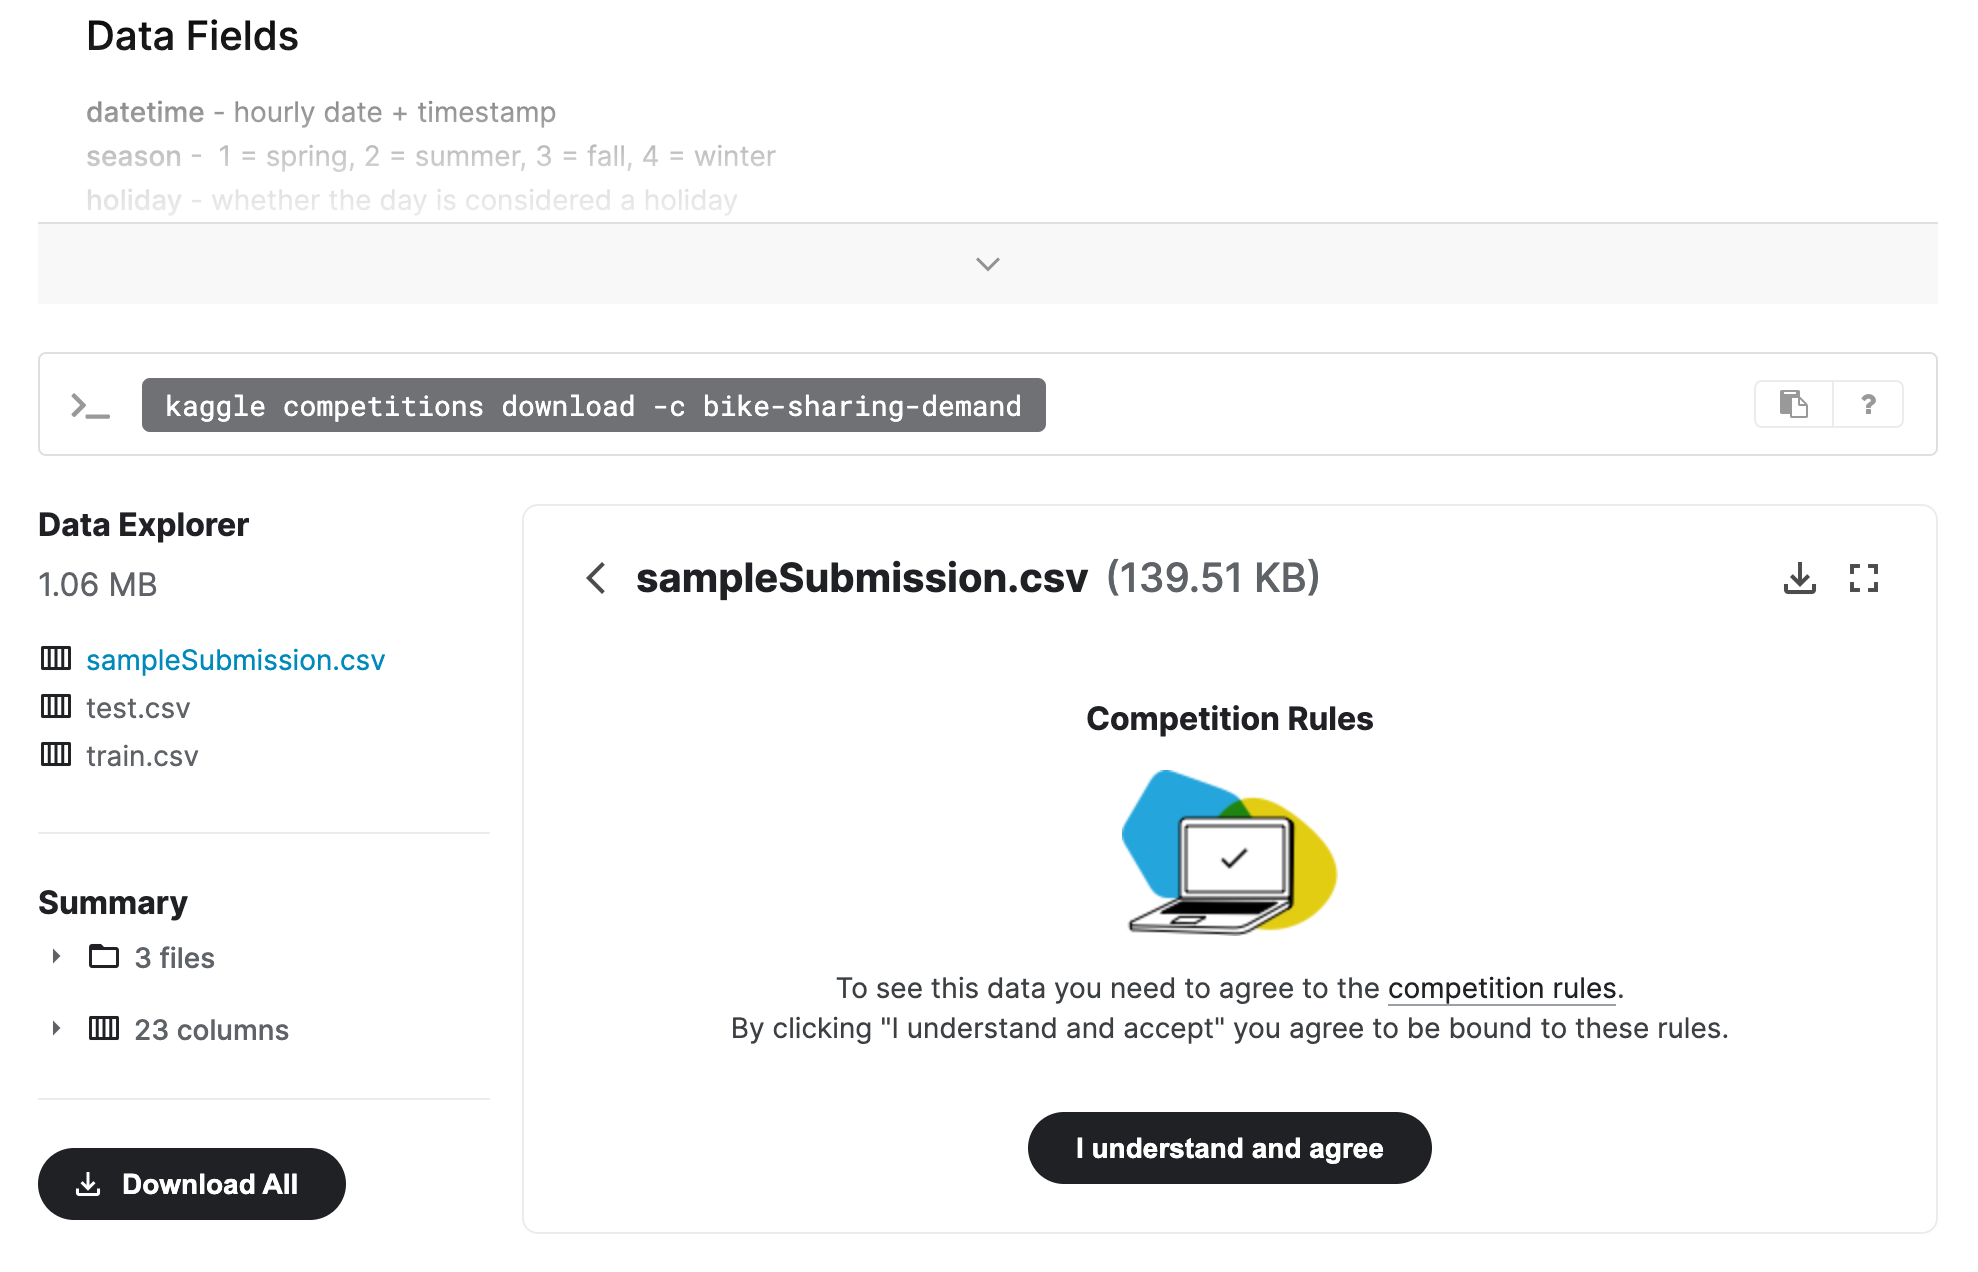

In [3]:
!pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-6.1.2-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [15]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
/bin/sh: 1: y: not found


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import seaborn as sns

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
# Parsing the datetime column
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


We can notice that : 
- None of the features is centered, we will have to standardize them in the following sections.
- The season, holiday, working day and weather columns are encoded as integers. We will need to change the encoding in the following sections as well.
- The datetime column is missing a lot of data.

In [9]:
# Printing informations about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
# Parsing the datetime column
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [51]:
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:, train.columns.difference(["casual","registered"])], time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221019_194002/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221019_194002/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2049.17 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stag

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.729069      14.257364  445.129123                0.001256           0.433843            3       True         15
1   RandomForestMSE_BAG_L2  -53.324848      13.405554  412.855981                0.590444          25.980774            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.717484      13.400470  395.048464                0.585360           8.173257            2       True         14
3          LightGBM_BAG_L2  -54.975211      13.080305  410.541249                0.265195          23.666042            2       True         11
4          CatBoost_BAG_L2  -55.578418      12.894655  450.923761                0.079545          64.048554            2       True         13
5        LightGBMXT_BAG_L2  -60.497960      16.269038  438.927994         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.41274077052907,
  'LightGBM_BAG_L1': -

Let's plot training scores of the top performers of the tested models.

<AxesSubplot:xlabel='model'>

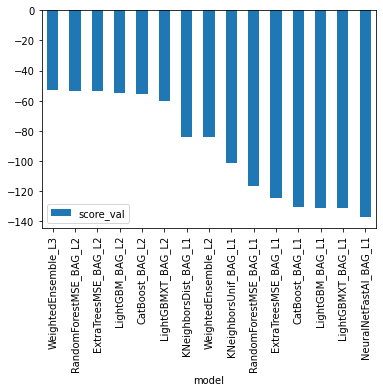

In [12]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
print("Predictions:  \n", predictions)

Predictions:  
 0        24.271076
1        40.670219
2        44.759418
3        48.270988
4        51.002129
           ...    
6488    158.364975
6489    158.364975
6490    154.558319
6491    147.399673
6492    153.469833
Name: count, Length: 6493, dtype: float32


In [17]:
predictions.describe()

count    6493.000000
mean      100.682121
std        90.388634
min         3.041300
25%        20.355358
50%        62.666965
75%       170.241760
max       363.189880
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
print("Negative predictions are : \n", predictions[predictions<0])

Negative predictions are : 
 Series([], Name: count, dtype: float32)


We have no negative values.

In [19]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "3nd raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 365kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2022-10-19 18:30:41  3nd raw submission    complete  1.80895      1.80895       
submission_new_features.csv  2022-10-16 22:46:40  new features          complete  1.80152      1.80152       
submission.csv               2022-10-16 20:05:41  2nd raw submission    complete  1.80406      1.80406       
submission.csv               2022-10-16 20:05:24  first raw submission  complete  1.80406      1.80406       


#### Initial score of `1.80406`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

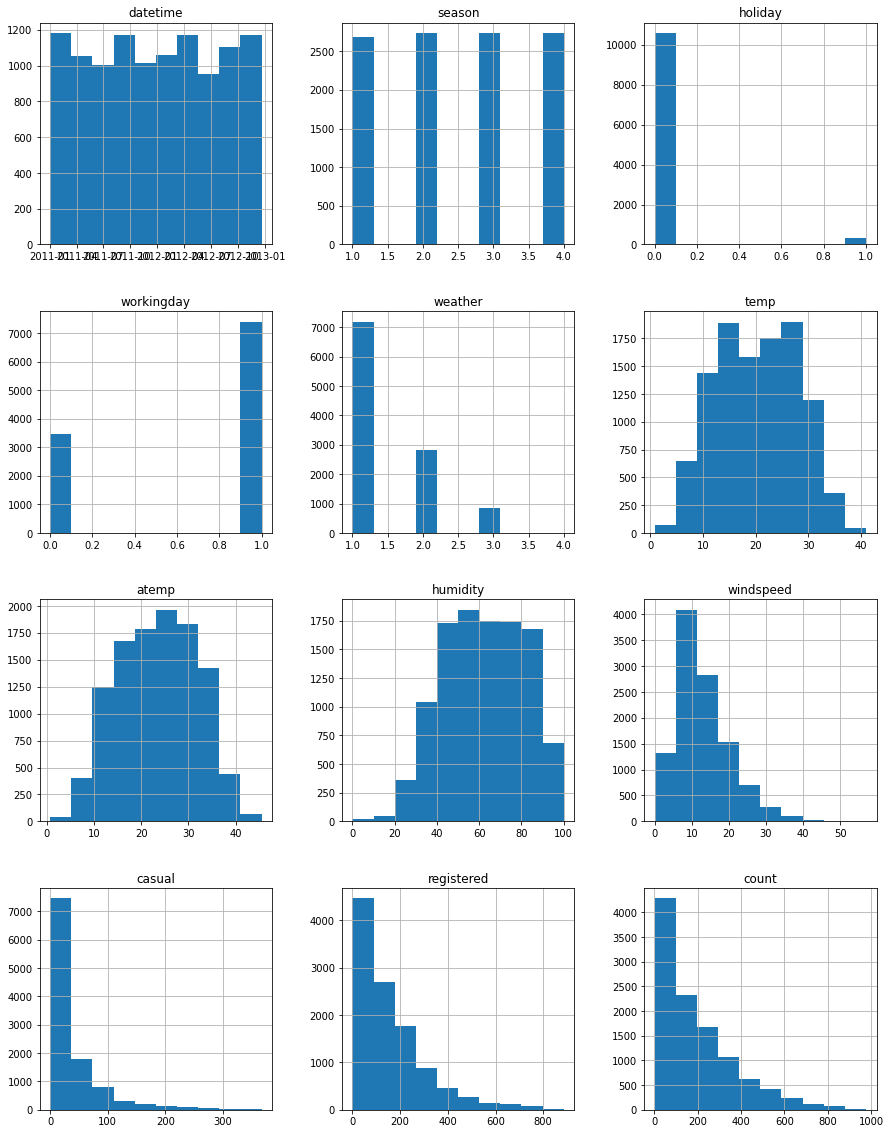

In [11]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)

In [24]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


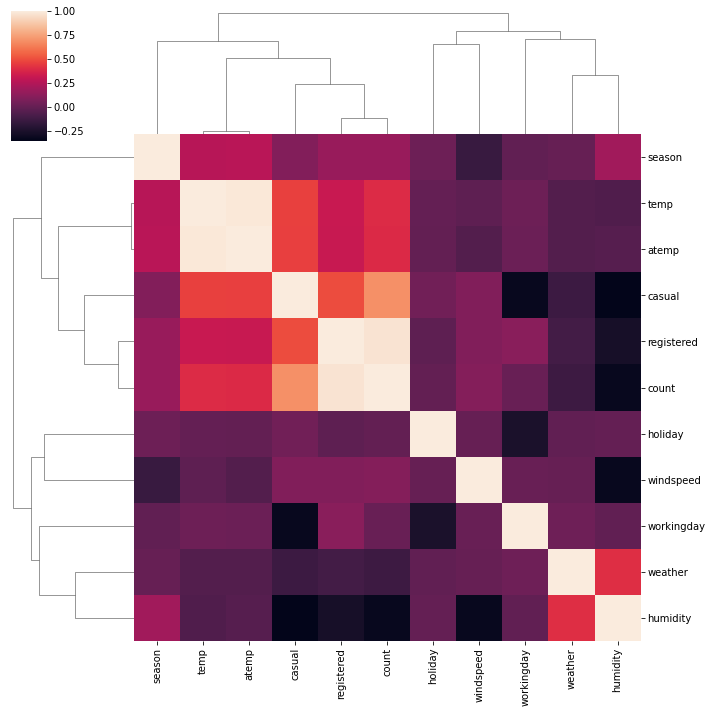

In [12]:
sns.clustermap(train.corr())

We can notice from the correlation matrix that the temp and atemp parameters are highly correlated. This makes sense, and we may want to only keep one parameter as keeping both would imply duplicating information. Other correlations are not as high.

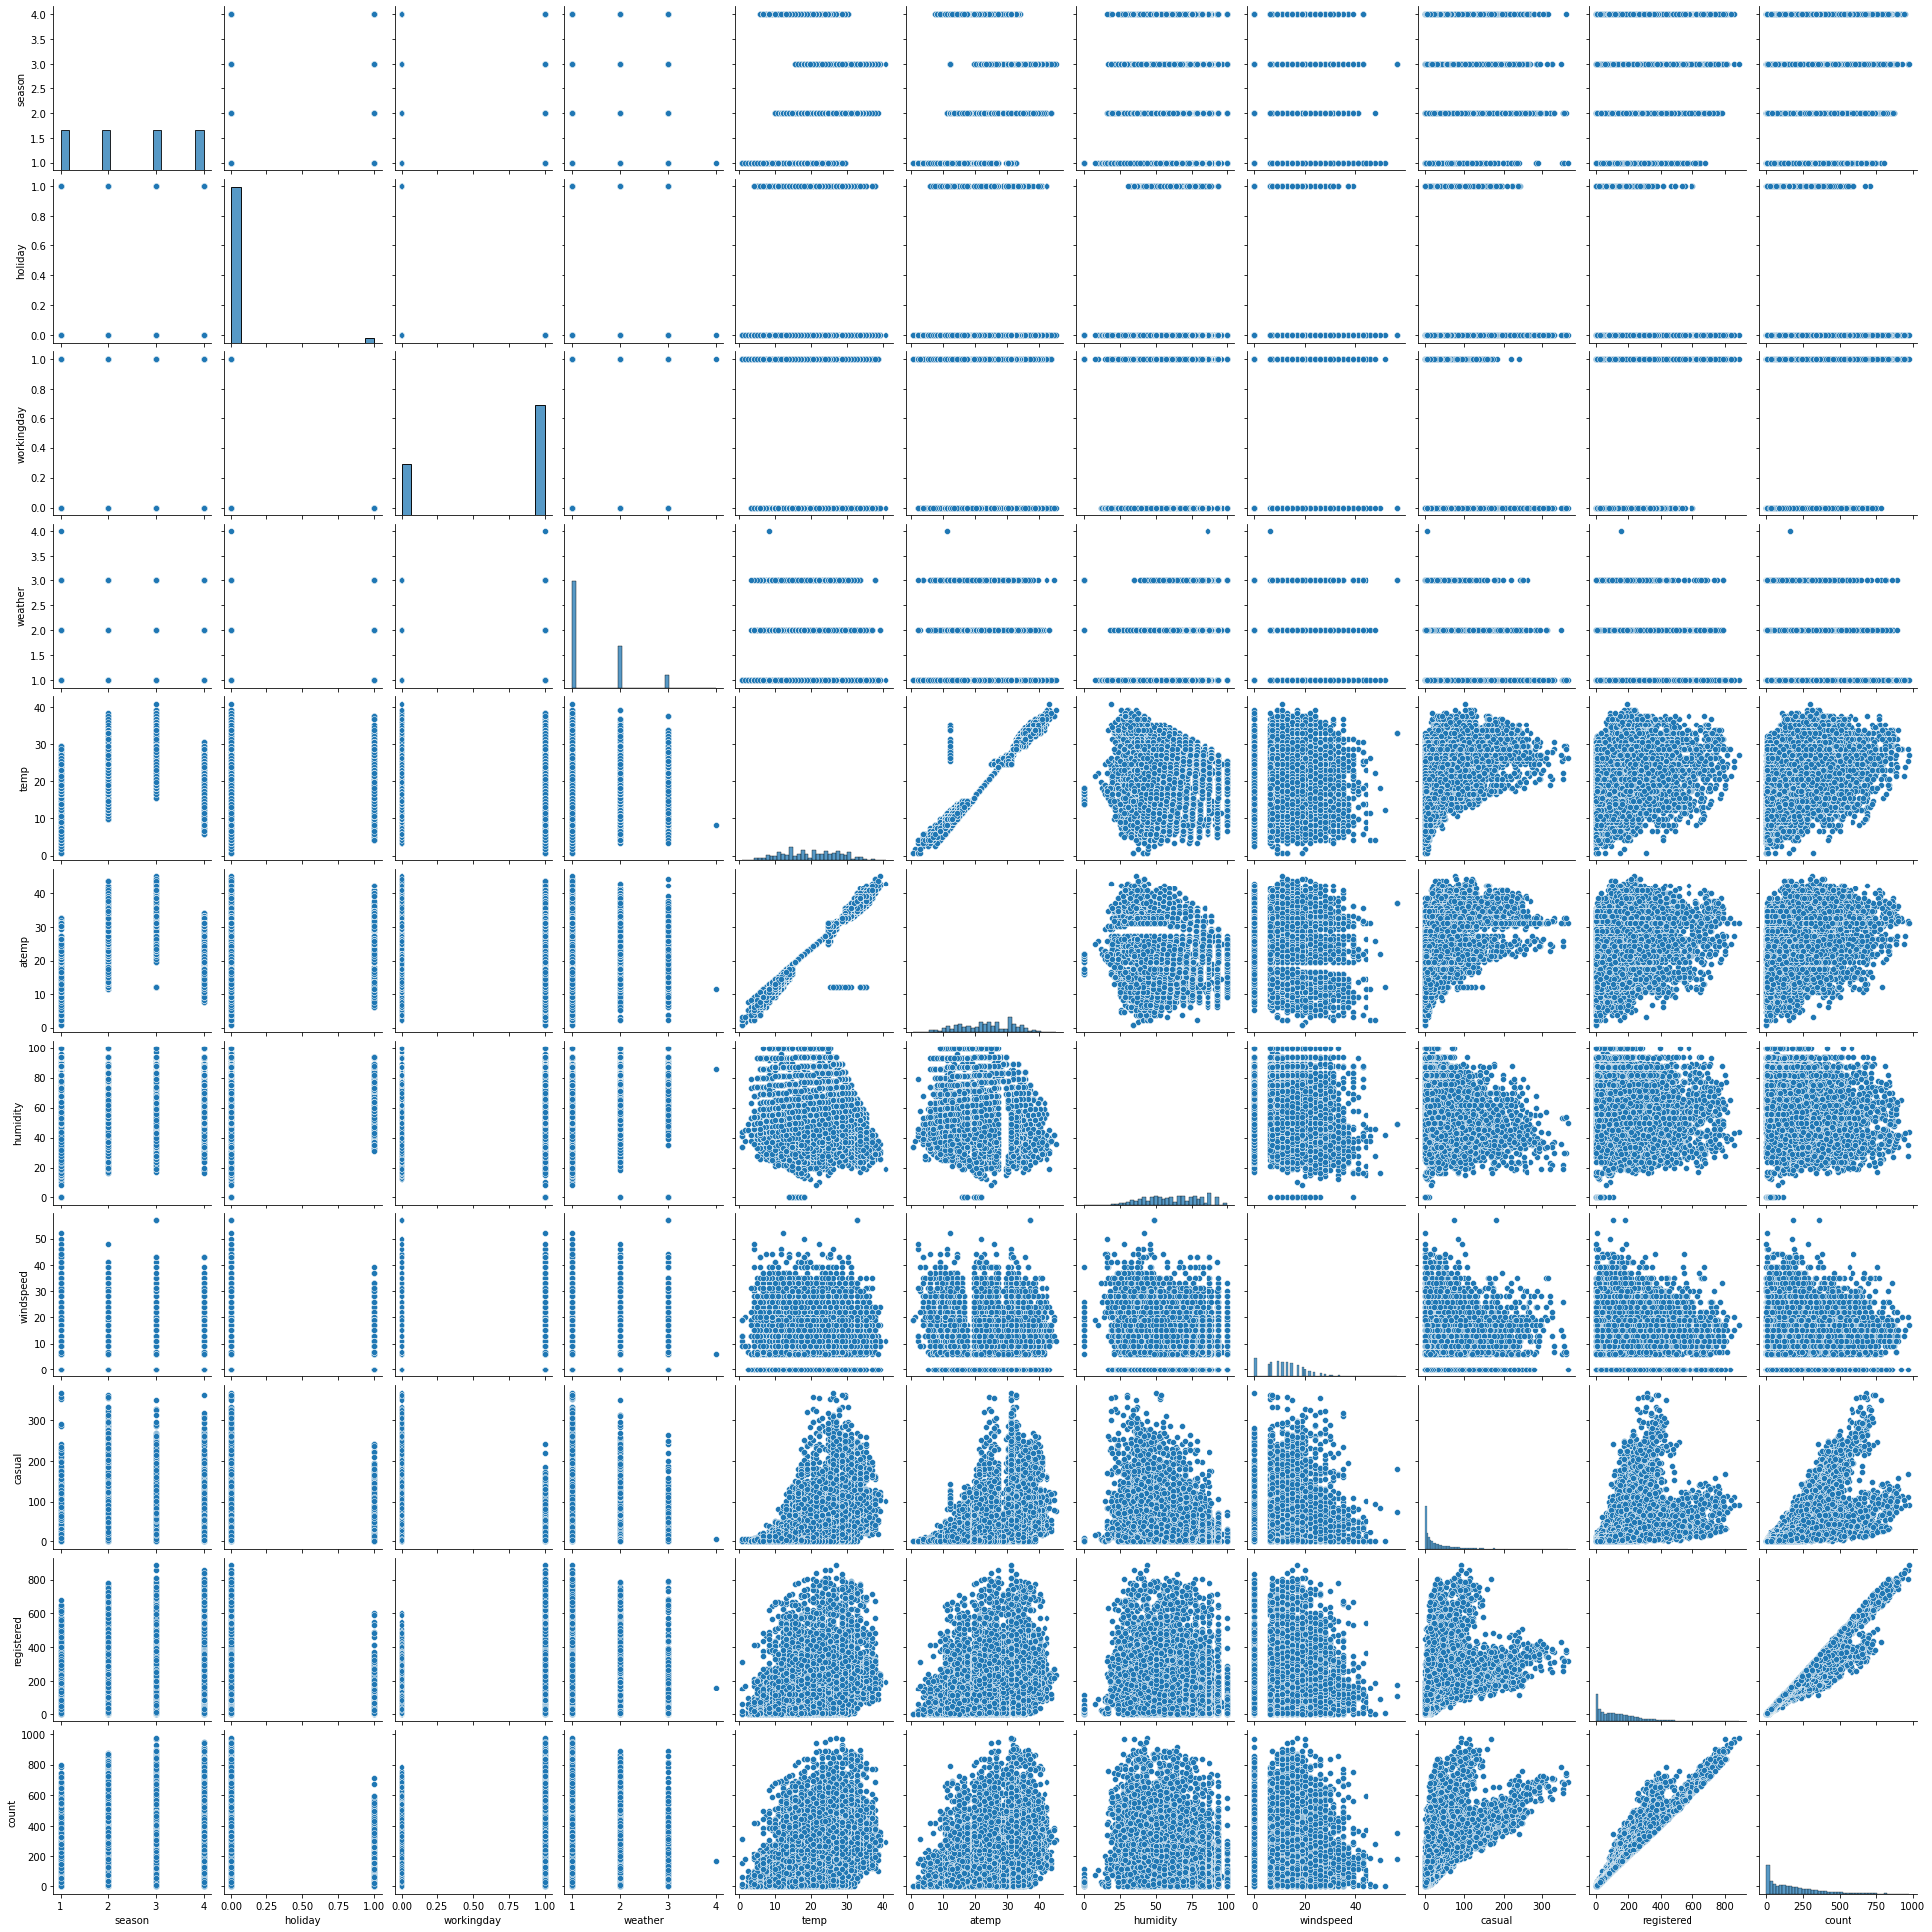

In [14]:
sns.pairplot(train)

We can notice from the pairplot a few things :
- During the fall season, the use of bikes is higher than other seasons. The least amount of rentals have been recorded during the summer.
- More rentals happen during working days than holidays or other non working days, this can be explained by the fact that people rent bikes to go to work.
- More rentals are recorded when the sky is clear or mildly cloudy.
- Humidity is not a very determining factor when it comes to bike rentals, as the count of rentals doesn't vary much as a function of humidity.
- Rentals tend to be higher for felt temperatures and recorded temperatures between 25 and 35 degrees.
- For windspeeds above 40 we have a low count of rentals. High amounts of rentals have been recorded for windspeeds under 30m/s.
- There is a high correlation between registered rentals and total number of rentals, as it is more easy to track registered rentals in comparison to casual rentals.

<AxesSubplot:xlabel='datetime'>

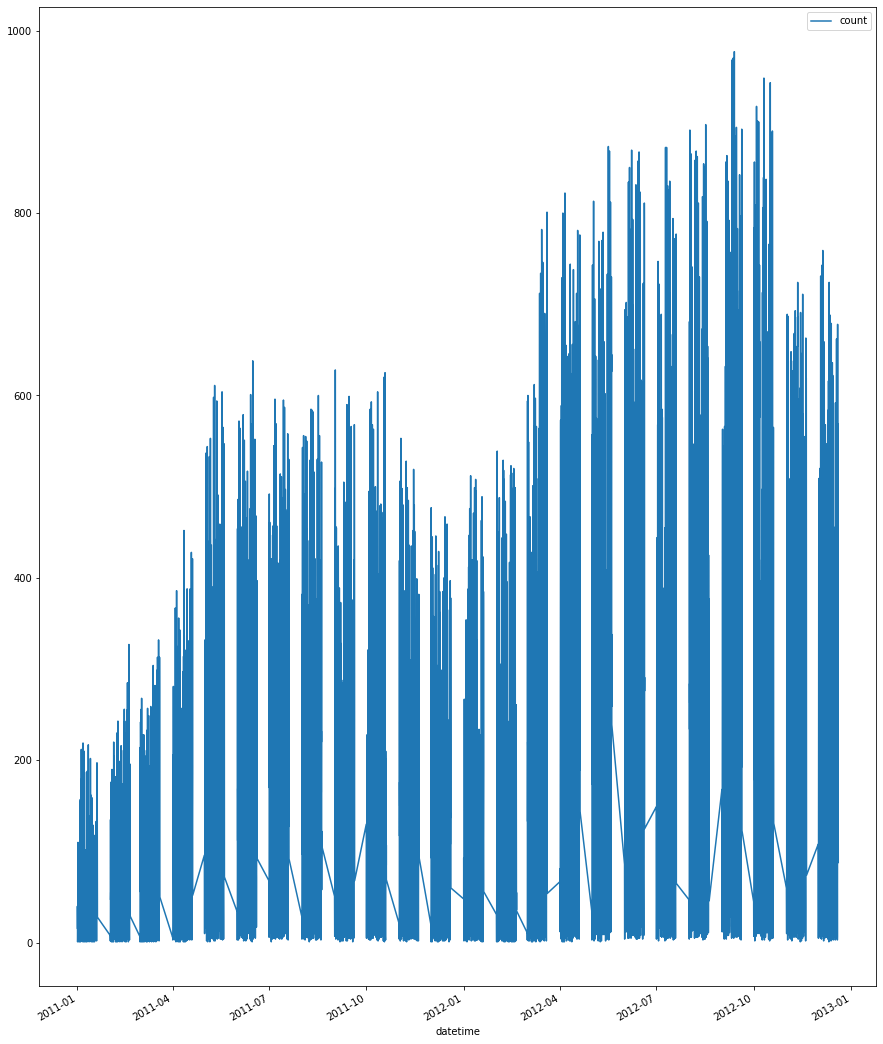

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.sort_values('datetime').plot.line('datetime','count',ax = ax)

The plot of counted rentals timeseries shows that the number of rentals increased from 2011 to 2013. We can also notice that within the same season, the number of rentals varies depending on the month. It would be interesting to add time features extracted from the dateime to the dataset to gain more insight on rental count variation for different granularity levels of time.

In [9]:
# create a new feature
# Separating datetime into year, month and day features
train_new = train
train_new["year"] = train_new.datetime.dt.year
train_new["month"] = train_new.datetime.dt.month
train_new["day"] = train_new.datetime.dt.day
train_new["hour"] = train_new.datetime.dt.hour

test_new = test
test_new["year"] = test_new.datetime.dt.year
test_new["month"] = test_new.datetime.dt.month
test_new["day"] = test_new.datetime.dt.day
test_new["hour"] = test_new.datetime.dt.hour

<AxesSubplot:xlabel='hour', ylabel='count'>

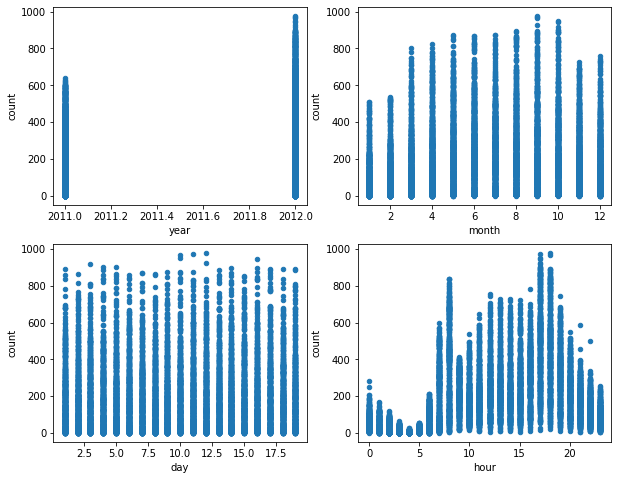

In [24]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
train.plot(ax=axes[0, 0], x="year", y="count", kind="scatter")
train.plot(ax=axes[0, 1], x="month", y="count", kind="scatter")
train.plot(ax=axes[1, 0], x="day", y="count", kind="scatter")
train.plot(ax=axes[1, 1], x="hour", y="count", kind="scatter")

We can notice that more bikes are rented at 08am and 5pm, which correspond to the start and end of work day hours.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

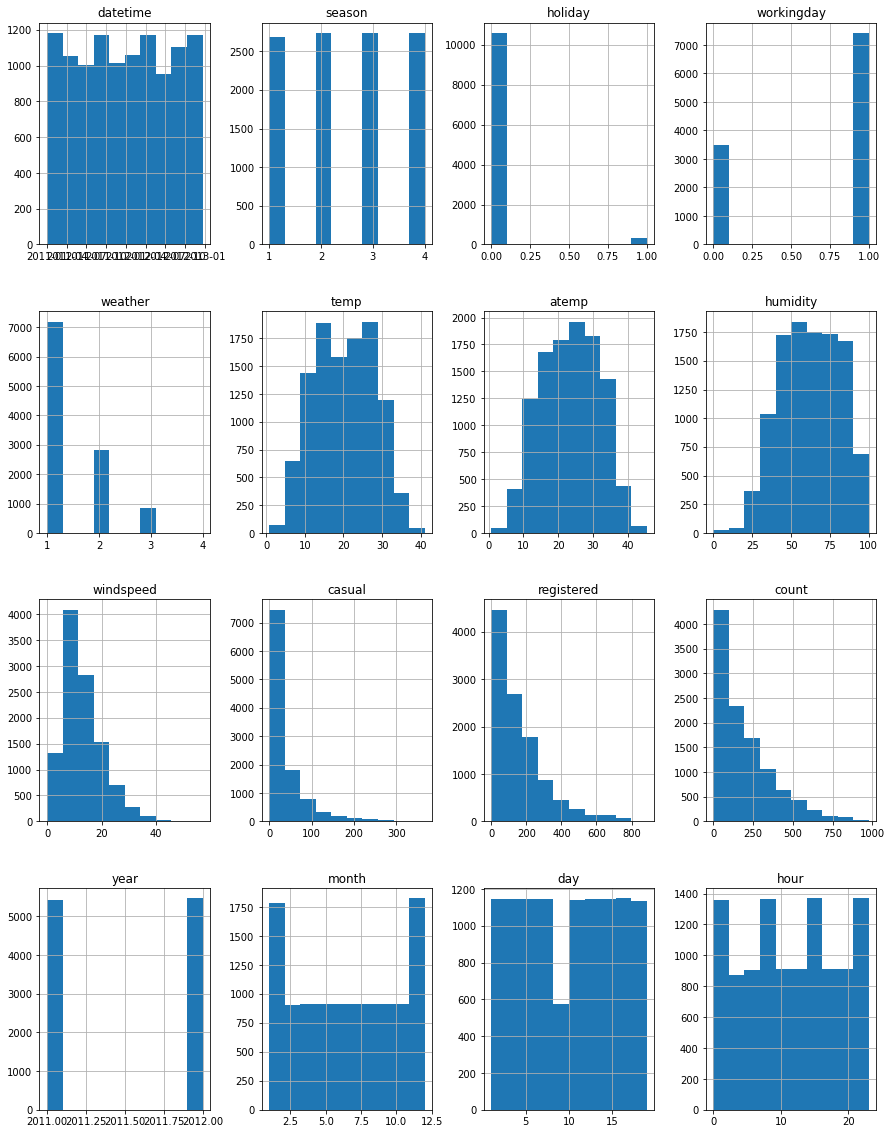

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_new.hist(ax = ax)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [9]:
train_new["season"] = train_new.season.astype('category')
train_new["weather"] = train_new.weather.astype('category')
train_new["holiday"] = train_new.holiday.astype('category')
train_new["workingday"] = train_new.workingday.astype('category')

test_new["season"] = test_new.season.astype('category')
test_new["weather"] = test_new.weather.astype('category')
test_new["holiday"] = test_new.holiday.astype('category')
test_new["workingday"] = test_new.workingday.astype('category')

In [55]:
# View are new feature
train_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

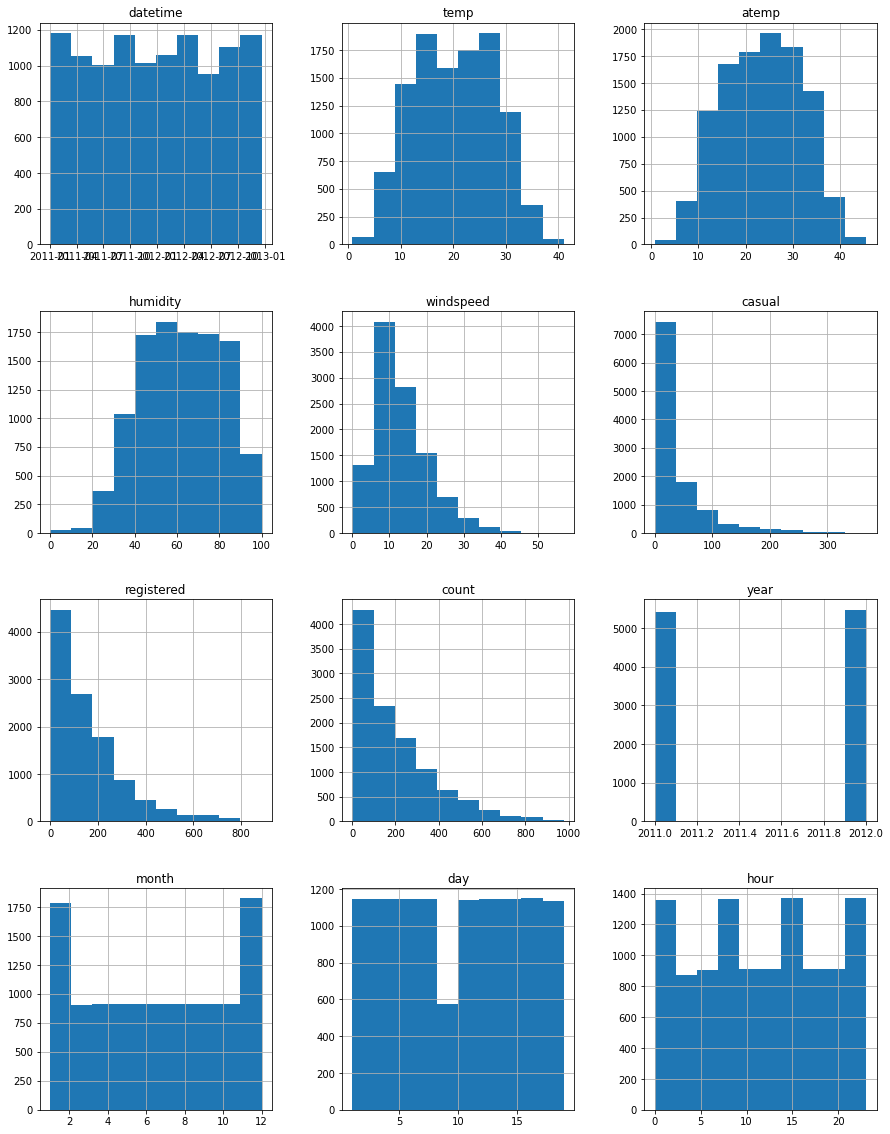

In [56]:
# View histogram of all features again now with the hour feature
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_new.hist(ax = ax)

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train_new.loc[:, train_new.columns.difference(["casual","registered"])], time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221023_205528/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221023_205528/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1982.02 MB
	Train Data (Original)  Memory Usage: 1.13 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Sta

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.252623      17.556348  529.136375                0.000796           0.323466            3       True         15
1          CatBoost_BAG_L2  -30.466598      16.121886  467.535128                0.095946          67.399496            2       True         13
2          LightGBM_BAG_L2  -30.747974      16.246617  424.158355                0.220676          24.022724            2       True         11
3        LightGBMXT_BAG_L2  -31.053955      16.615151  427.785796                0.589211          27.650164            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.438204      16.649720  409.740524                0.623779           9.604893            2       True         14
5   RandomForestMSE_BAG_L2  -31.736159      16.777495  431.193593         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.494653086618804,
  'LightGBM_BAG_L1': -

In [27]:
performance = predictor_new_features.evaluate(test_new)
print("The performance indicators are : \n", performance)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -196.38650113235116
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -196.38650113235116,
    "mean_squared_error": -38567.65782700696,
    "mean_absolute_error": -149.05909678496474,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -116.65669250488281
}


The performance indicators are : 
 {'root_mean_squared_error': -196.38650113235116, 'mean_squared_error': -38567.65782700696, 'mean_absolute_error': -149.05909678496474, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -116.65669250488281}


In [58]:
# Remember to set all negative values to zero
predictions_new_features = predictor.predict(test_new)

In [41]:
print('Negative predictions are :', predictions_new_features[predictions_new_features<0])

Negative predictions are : Series([], Name: count, dtype: float32)


In [59]:
# Same submitting predictions
submission_new_features = submission
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features + set weather, holiday, season, workingday "

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 290kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                               status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-10-19 20:23:34  new features + set weather, holiday, season, workingday   complete  1.80119      1.80119       
submission_new_features.csv  2022-10-19 19:25:25  new features + set weather, holiday, season, workingday   complete  1.80895      1.80895       
submission.csv               2022-10-19 18:30:41  3nd raw submission                                        complete  1.80895      1.80895       
submission_new_features.csv  2022-10-16 22:46:40  new features                                              complete  1.80152      1.80152       


#### New Score of `1.80119 `

### Removing datetime variable

In [11]:
predictor_wo_datetime = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train_new.loc[:, train_new.columns.difference(["datetime","casual","registered"])], time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221023_202702/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221023_202702/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2982.12 MB
	Train Data (Original)  Memory Usage: 1.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Sta

In [12]:
predictor_wo_datetime.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.999372      28.068213  520.002633                0.001175           0.430852            3       True         16
1      WeightedEnsemble_L2  -36.022646      25.732827  354.641560                0.001569           1.012878            2       True          9
2          CatBoost_BAG_L2  -36.275163      26.794154  428.989806                0.060683          30.213794            2       True         13
3     ExtraTreesMSE_BAG_L2  -36.386579      27.413426  407.229927                0.679956           8.453914            2       True         14
4          LightGBM_BAG_L2  -36.550106      26.843183  421.308851                0.109712          22.532838            2       True         11
5   NeuralNetFastAI_BAG_L2  -36.755484      27.216686  458.371235         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.78100255079445,
  'KNeighborsDist_BAG_L1': -119.1940601717705

In [16]:
test_new["count"] = 0
performance = predictor_wo_datetime.evaluate(test_new.loc[:, test_new.columns.difference(["datetime"])])
print("The performance indicators are : \n", performance)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -256.9979977163498
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -256.9979977163498,
    "mean_squared_error": -66047.97083021293,
    "mean_absolute_error": -189.7036975675971,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -144.92901611328125
}


The performance indicators are : 
 {'root_mean_squared_error': -256.9979977163498, 'mean_squared_error': -66047.97083021293, 'mean_absolute_error': -189.7036975675971, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -144.92901611328125}


In [17]:
# Remember to set all negative values to zero
predictions_wo_datetime = predictor_wo_datetime.predict(test_new.loc[:, test_new.columns.difference(["datetime"])])

In [18]:
print('Negative predictions are :', predictions_wo_datetime[predictions_wo_datetime<0])

Negative predictions are : Series([], Name: count, dtype: float32)


In [22]:
# Same submitting predictions
submission_wo_datetime = submission
submission_wo_datetime["count"] = predictions_wo_datetime
submission_wo_datetime.to_csv("submission_new_features_no_datetime.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_no_datetime.csv -m "new features + without datetime + set weather, holiday, season, workingday as categorical data "

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 302kB/s]
Successfully submitted to Bike Sharing Demand

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                 date                 description                                                                                      status    publicScore  privateScore  
---------------------------------------  -------------------  -----------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_features_no_datetime.csv  2022-10-23 20:47:25  new features + without datetime + set weather, holiday, season, workingday as categorical data   complete  0.47409      0.47409       
submission_new_hpo.csv                   2022-10-23 02:55:42  new features with hyperparameter tuning of GBM and XGBoost                                       complete  0.47866      0.47866       
submission_new_hpo.csv                   2022-10-23 02:24:32  new features with hyperparameter tuning of GBM and XGBoost                                       complete  0.47866      0.47866       
submission_new_

#### New Score of `1.80119 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

### First hpo attempt

In this first attempt to tune the hyperparameters, I will change two factors :
- setting the hyperparameters to default 
- setting the hyperparameter_tune_kwargs to automatic mode

In [28]:
hyperparameters = 'default'
hyperparameter_tune_kwargs = 'auto'

predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train_new.loc[:, train_new.columns.difference(["casual","registered"])], time_limit=600, presets="best_quality",
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


No path specified. Models will be saved in: "AutogluonModels/ag-20221023_211333/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221023_211333/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2346.99 MB
	Train Data (Original)  Memory Usage: 1.13 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Sta

[1000]	valid_set's rmse: 35.8966
[2000]	valid_set's rmse: 33.8791


	Ran out of time, early stopping on iteration 2741. Best iteration is:
	[2729]	valid_set's rmse: 33.4549
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-33.4549	 = Validation score   (-root_mean_squared_error)
	3.75s	 = Training   runtime
	0.23s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 4.09s of the 593.6s of remaining time.


[1000]	valid_set's rmse: 33.0497


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-32.9844	 = Validation score   (-root_mean_squared_error)
	1.65s	 = Training   runtime
	0.07s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 4.09s of the 591.11s of remaining time.
	No hyperparameter search space specified for RandomForestMSE. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1385, in _train_single_full
    **model_fit_kwargs
  File "/usr/local/lib/python3.7/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1001, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 182, in _hyperparameter_tune
    return super()._hy

In [27]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -32.303080      13.229172  448.804626                0.000901           0.387506            3       True         14
1    WeightedEnsemble_L2 -32.316131      12.340177  337.509858                0.001140           0.295377            2       True          6
2     CatBoost_BAG_L2/T1 -32.518530      12.449266  372.622336                0.110229          35.407855            2       True         11
3     LightGBM_BAG_L2/T1 -32.610988      12.477141  356.246051                0.138104          19.031570            2       True          9
4      XGBoost_BAG_L2/T1 -32.942820      12.481319  351.933692                0.142282          14.719211            2       True         12
5   LightGBMXT_BAG_L2/T1 -33.346366      12.574636  357.023190                0.235599      

{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1/T1': -34.33745545082705,
  'LightGBM_BAG_L1/T1': -33.91598594261488,
  'CatBoost_BAG_L1/T1': -34.70722968272442,
  'XGBoost_BAG_L1/T1': -34.552674851674695,
  'LightGBMLarge_BAG_L1': -33.68760

Let's plot scores of the top performers of the tested models.

<AxesSubplot:xlabel='model'>

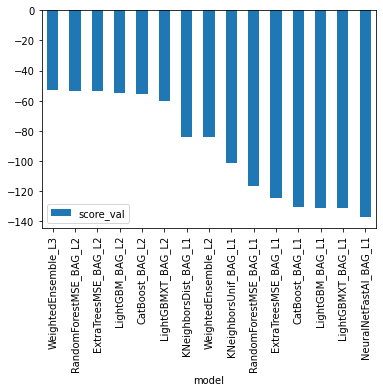

In [12]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [28]:
# Remember to set all negative values to zero
test_new["count"] = 0
performance_new_hpo = predictor_new_hpo.evaluate(test_new)
print("The performance indicators are : \n", performance_new_hpo)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -256.7605465791283
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -256.7605465791283,
    "mean_squared_error": -65925.97827961271,
    "mean_absolute_error": -190.33855804882228,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -149.23776245117188
}


The performance indicators are : 
 {'root_mean_squared_error': -256.7605465791283, 'mean_squared_error': -65925.97827961271, 'mean_absolute_error': -190.33855804882228, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -149.23776245117188}


In [29]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_hpo.predict(test_new)

In [18]:
predictions_new_features

0        12.811199
1         7.545908
2         7.033610
3         6.769294
4         6.894789
           ...    
6488    327.683197
6489    218.574661
6490    148.141708
6491     97.523758
6492     48.462696
Name: count, Length: 6493, dtype: float32

In [19]:
predictions_new_features[predictions_new_features<0]

Series([], Name: count, dtype: float32)

In [23]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_new_features
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 349kB/s]
Successfully submitted to Bike Sharing Demand

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                               status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-10-19 22:30:48  new features with hyperparameters                         complete  0.48898      0.48898       
submission_new_features.csv  2022-10-19 20:23:34  new features + set weather, holiday, season, workingday   complete  1.80119      1.80119       
submission_new_features.csv  2022-10-19 19:25:25  new features + set weather, holiday, season, workingday   complete  1.80895      1.80895       
submission.csv               2022-10-19 18:30:41  3nd raw submission                                        complete  1.80895      1.80895       


#### New Score of `0.48898 `

### Second hpo attempt

I will hereafter tune the hyperparameters of some of the models tested by autogluon. I will specifically tune models that were among the top 10 performers in the first hyperparameter tuning attempt. Therefore, in this section, I will test different parameters for LightGBM and XGBoost. Since CATboost usally performs well with default parameters, I will not tune it.

In [31]:
gbm_config = [{'num_boost_round': 100},  # number of boosting rounds (controls training time of GBM models)
              #'num_leaves': ag.space.Int(lower=10, upper=50),  # number of leaves in trees (integer hyperparameter)
              {'num_leaves': 70},
              {'num_leaves': 100},
              {'num_leaves':150}]



xgb_config = [{'eta ':0.1}, 
              {'eta':0.2}, 
              {'n_estimators':50},
              {'n_estimators':100}, 
              {'n_estimators':150}]

#dict = {‘RF’: [{‘criterion’: ‘gini’}, {‘criterion’: ‘entropy’}]}

hyperparameters = hyperparameters = {
                                       'GBM': gbm_config,
                                       #'CAT':cat_config,
                                       'XGB': xgb_config
                                      }
#hyperparameter_tune_kwargs = 'auto'
hyperparameter_tune_kwargs = {'searcher': 'auto'}

predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train_new.loc[:, train_new.columns.difference(["casual","registered"])], time_limit=600, presets="best_quality",
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


No path specified. Models will be saved in: "AutogluonModels/ag-20221023_025044/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221023_025044/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2458.08 MB
	Train Data (Original)  Memory Usage: 0.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Sta

ValueError: AutoGluon did not successfully train any models

In [32]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -32.616308       8.485239  370.376266                0.001056           0.431738            3       True         43
1    WeightedEnsemble_L2  -32.739922       6.628335  189.298007                0.000808           0.767611            2       True         30
2     LightGBM_BAG_L2/T1  -32.762137       8.316424  340.986121                0.134214          17.128103            2       True         31
3    XGBoost_2_BAG_L2/T1  -32.880989       8.349969  352.816425                0.167759          28.958407            2       True         36
4   LightGBM_2_BAG_L2/T1  -33.223683       8.356585  354.616779                0.174376          30.758761            2       True         33
5   LightGBM_3_BAG_L2/T1  -33.446330       8.339879  358.925689                0.15766

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_3_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_4_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_2_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T5': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T6': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T7': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T8': 'StackerEnsembleModel_XGBoost'

<AxesSubplot:xlabel='model'>

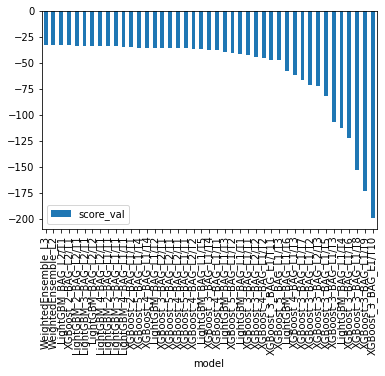

In [33]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [34]:
# Remember to set all negative values to zero
test_new["count"] = 0
performance_new_hpo = predictor_new_hpo.evaluate(test_new)
print("The performance indicators are : \n", performance_new_hpo)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -257.90773442592734
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -257.90773442592734,
    "mean_squared_error": -66516.39947671468,
    "mean_absolute_error": -190.9576504444573,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -147.15931701660156
}


The performance indicators are : 
 {'root_mean_squared_error': -257.90773442592734, 'mean_squared_error': -66516.39947671468, 'mean_absolute_error': -190.9576504444573, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -147.15931701660156}


In [35]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_hpo.predict(test_new)

In [36]:
predictions_new_features

0        10.835062
1         7.043610
2         6.781248
3         6.762746
4         6.762746
           ...    
6488    359.697021
6489    215.506653
6490    159.988556
6491    101.330910
6492     56.446304
Name: count, Length: 6493, dtype: float32

In [37]:
predictions_new_features[predictions_new_features<0]

Series([], Name: count, dtype: float32)

In [38]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_new_features
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameter tuning of GBM and XGBoost"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 381kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                 status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-10-23 02:55:42  new features with hyperparameter tuning of GBM and XGBoost  complete  0.47866      0.47866       
submission_new_hpo.csv       2022-10-23 02:24:32  new features with hyperparameter tuning of GBM and XGBoost  complete  0.47866      0.47866       
submission_new_hpo.csv       2022-10-19 22:30:48  new features with hyperparameters                           complete  0.48898      0.48898       
submission_new_features.csv  2022-10-19 20:23:34  new features + set weather, holiday, season, workingday     complete  1.80119      1.80119       


### Testing a new algorithm to compare performance with autogluon

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
#Et on lance le training sur notre dataset de train
rf.fit(train_new[train_new.columns.difference(['count','datetime'])], train_new.count)

TypeError: Singleton array array(<bound method DataFrame.count of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  
0        1     0  
1        1     1  
2        1     2  
3        1     3  
4        1     4  
...    ...   ...  
10881   19    19  
10882   19    20  
10883   19    21  
10884   19    22  
10885   19    23  

[10886 rows x 16 columns]>, dtype=object) cannot be considered a valid collection.

#### New Score of `0.47866`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

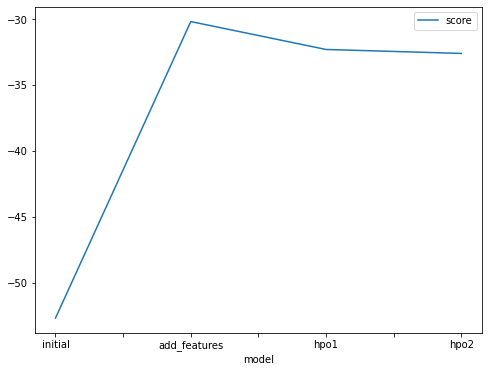

In [30]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo1", "hpo2"],
        "score": [ -52.7, -30.18, -32.3, -32.6]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score_project.png')

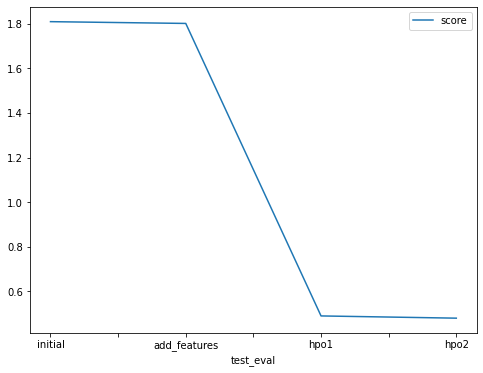

In [31]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1", "hpo2"],
        "score": [1.809, 1.801, 0.49, 0.48]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score_project.png')

### Hyperparameter table

In [42]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time_limit": [600, 600, 600],
    "presets": ["best_quality", "best_quality", "best_quality"],
    "hyperparameters": ['default', 'default', "{'GBM': gbm_config,'XGB': xgb_config}"],
    "hyperparameter_tune_kwargs":["-", "auto", "{'searcher':'auto'}"],
    "score": [1.809, 0.49, 0.48]
})

,model,time_limit,presets,hyperparameters,hyperparameter_tune_kwargs,score
0,initial,600,best_quality,default,-,1.809
1,add_features,600,best_quality,default,auto,0.490
2,hpo,600,best_quality,"{'GBM': gbm_config,'XGB': xgb_config}",{'searcher':'auto'},0.480
